<a href="https://colab.research.google.com/github/CYBORG670/DenmarkR-VARS-VECM-/blob/main/Glmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/ML/Credit_card.xlsx")
labels = pd.read_excel("/content/drive/MyDrive/ML/Credit_card_label.xlsx")
df = pd.merge(df,labels,on='Ind_ID',how='inner')

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df = df.drop(['Ind_ID','Mobile_phone','Work_Phone','Phone','EMAIL_ID'],axis=1)

In [ ]:
print(f"duplicates before : {df.duplicated().sum()}")
df = df.drop_duplicates().reset_index().drop('index',axis=1)
print(f"duplicates after : {df.duplicated().sum()}")

duplicates before : 162
duplicates after : 0


In [ ]:
df.isnull().sum()

GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    438
Family_Members       0
label                0
dtype: int64

In [ ]:
df.isnull().sum().sum()/len(df)

0.35353535353535354

In [ ]:
df = df.dropna().reset_index().drop('index',axis=1)

In [ ]:
print(f"Length of data frame : {len(df)}")
print(f"Missing values : {df.isnull().sum().sum()}")
print(f"Diplicated values : {df.duplicated().sum()}")

Length of data frame : 913
Missing values : 0
Diplicated values : 0


In [ ]:
ObjectCol = list((set(df.columns)-set(df.describe().columns)))

In [ ]:
for x in ObjectCol:
    print(x)
    print(df[x].unique())
    print('============')

Type_Income
['Commercial associate' 'Pensioner' 'Working' 'State servant']
GENDER
['M' 'F']
Car_Owner
['Y' 'N']
Propert_Owner
['Y' 'N']
EDUCATION
['Secondary / secondary special' 'Higher education' 'Lower secondary'
 'Incomplete higher']
Type_Occupation
['Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'Managers' 'Cleaning staff' 'Drivers' 'Low-skill Laborers'
 'High skill tech staff' 'IT staff' 'Waiters/barmen staff'
 'Security staff' 'Medicine staff' 'Private service staff' 'HR staff'
 'Secretaries' 'Realty agents']
Marital_status
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Housing_type
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


In [ ]:
df.Marital_status= df.Marital_status.replace('Civil marriage','Married')
df.Marital_status= df.Marital_status.replace('Widow','Separated')
df.Marital_status= df.Marital_status.replace('Single / not married','Single')

In [ ]:
df.Marital_status= df.Marital_status.replace('Civil marriage','Married')
df.Marital_status= df.Marital_status.replace('Widow','Separated')
df.Marital_status= df.Marital_status.replace('Single / not married','Single')

<Axes: >

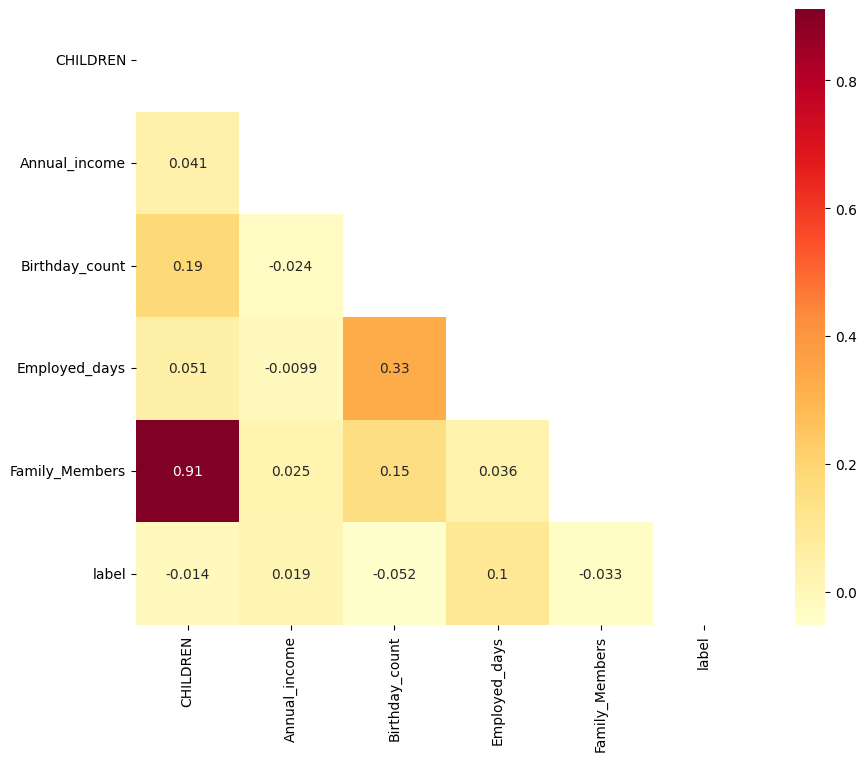

In [ ]:
plt.figure(figsize=(10,8))
corr= df[df.describe().columns].corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix,cmap ="YlOrRd")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

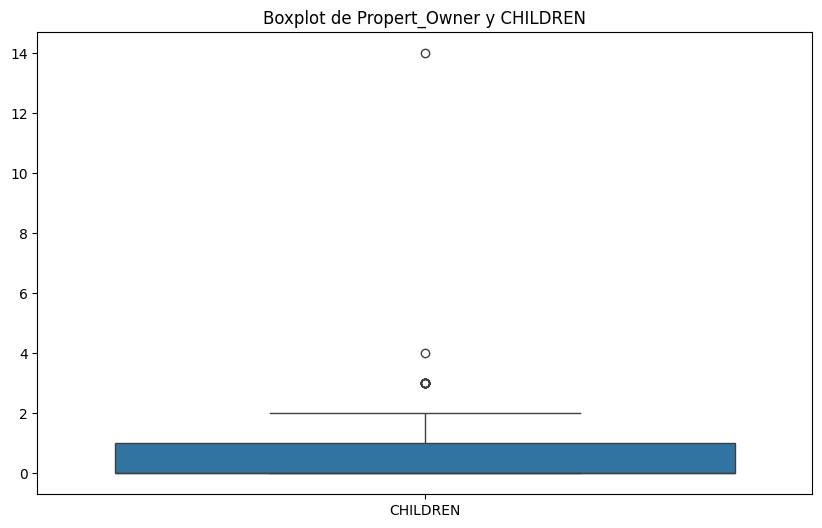

In [ ]:
drawBoxPlot(df, 2, 3)

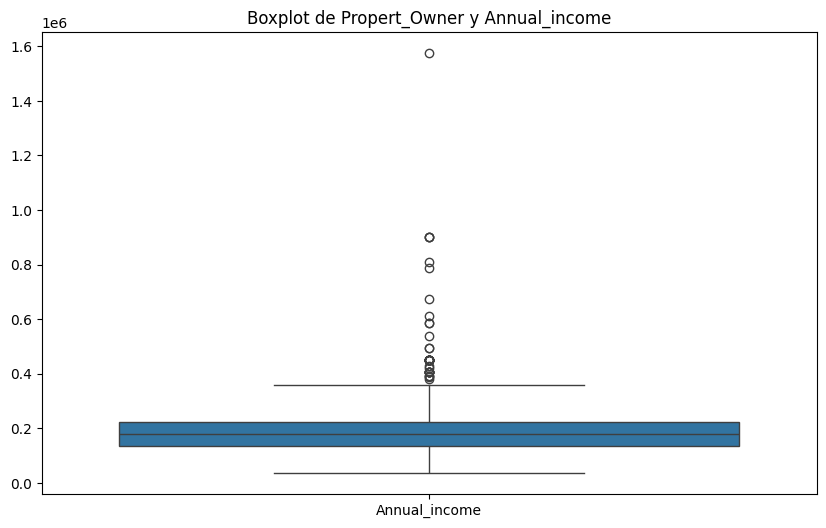

In [ ]:
drawBoxPlot(df, 2, 4)

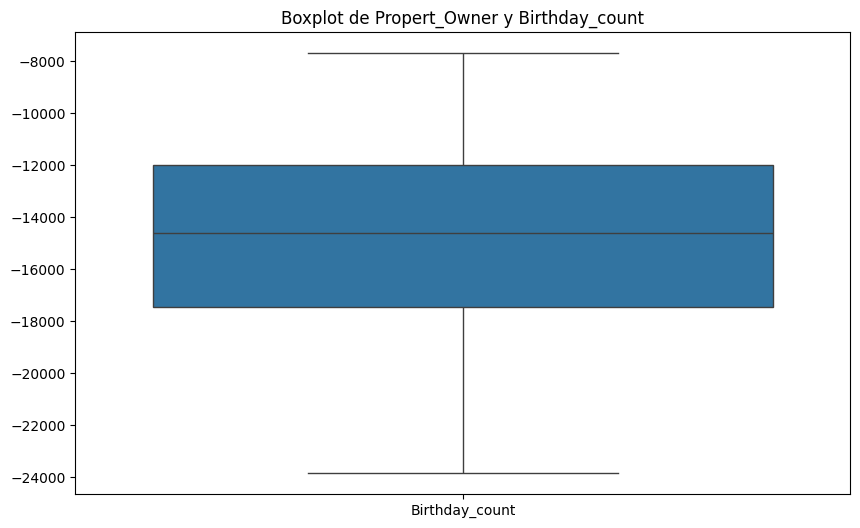

In [ ]:
drawBoxPlot(df, 2, 9)

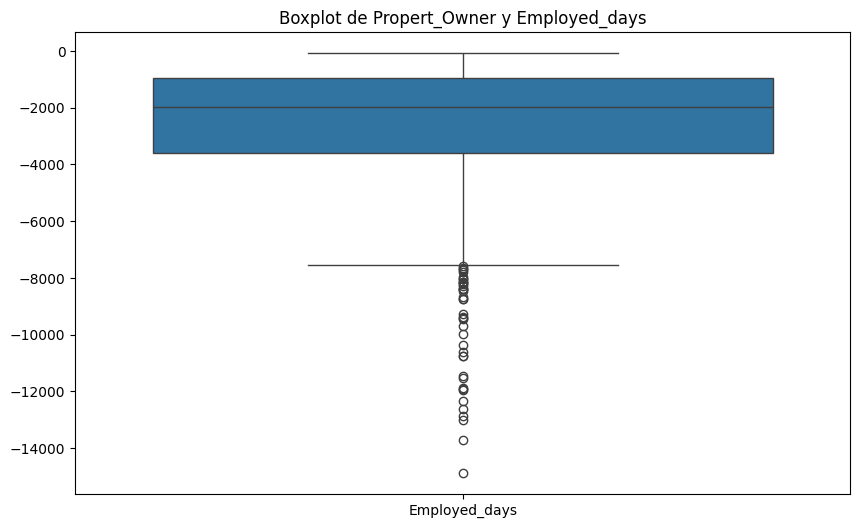

In [ ]:
drawBoxPlot(df, 2, 10)

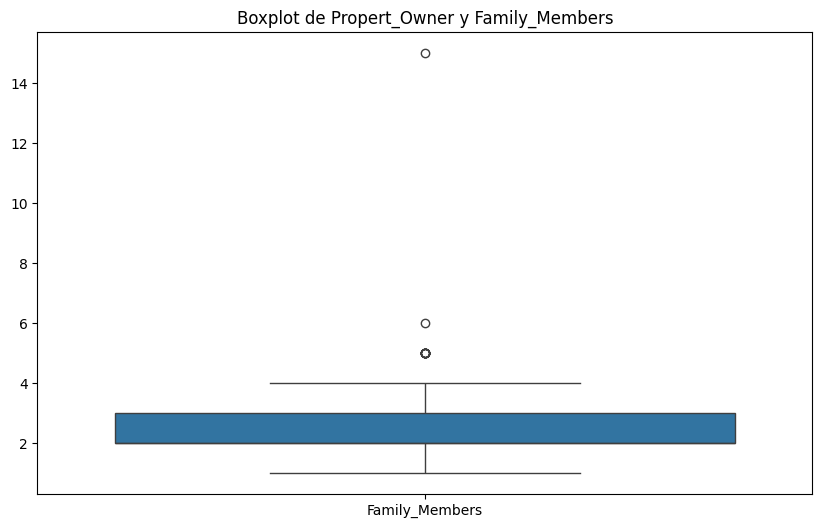

In [ ]:
drawBoxPlot(df, 2, 12)

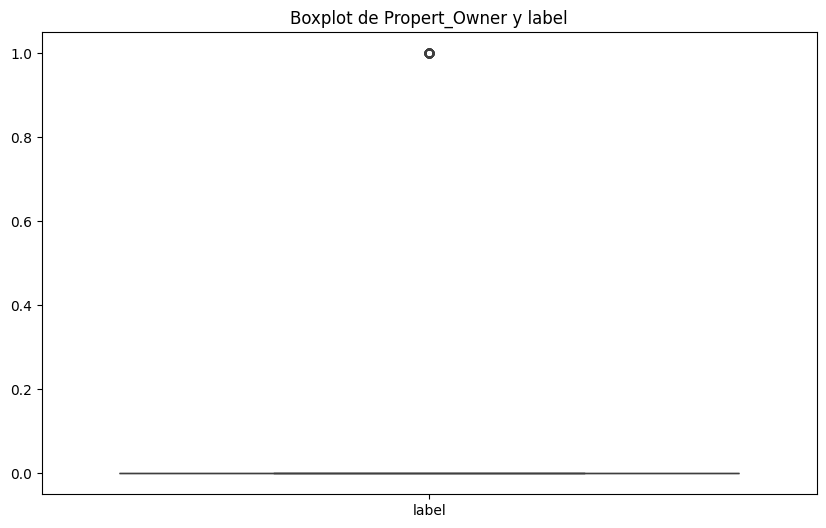

In [ ]:
drawBoxPlot(df, 2, 13)

In [ ]:
ObjectCol = list((set(df.columns)-set(df.describe().columns))) # Get
maplist = []
def toIndexLabel(df,col):
  maplist=[]
  count=0
  uni = df[col].unique()
  for x in df[col].unique():
    df[col]=df[col].replace(x,count)
    count+=1
  maplist+=[pd.DataFrame(dict({f'{col}':uni,'map':list(range(count))})).set_index(f'{col}')]
  return maplist
for x in ObjectCol:
   maplist+= toIndexLabel(df,x)

In [ ]:
for x in range(len(maplist)):
    print(maplist[x].to_dict()['map'])

{'Commercial associate': 0, 'Pensioner': 1, 'Working': 2, 'State servant': 3}
{'M': 0, 'F': 1}
{'Y': 0, 'N': 1}
{'Y': 0, 'N': 1}
{'Secondary / secondary special': 0, 'Higher education': 1, 'Lower secondary': 2, 'Incomplete higher': 3}
{'Core staff': 0, 'Cooking staff': 1, 'Laborers': 2, 'Sales staff': 3, 'Accountants': 4, 'Managers': 5, 'Cleaning staff': 6, 'Drivers': 7, 'Low-skill Laborers': 8, 'High skill tech staff': 9, 'IT staff': 10, 'Waiters/barmen staff': 11, 'Security staff': 12, 'Medicine staff': 13, 'Private service staff': 14, 'HR staff': 15, 'Secretaries': 16, 'Realty agents': 17}
{'Married': 0, 'Single': 1, 'Separated': 2}
{'House / apartment': 0, 'Rented apartment': 1, 'Municipal apartment': 2, 'With parents': 3, 'Co-op apartment': 4, 'Office apartment': 5}


<Axes: xlabel='label'>

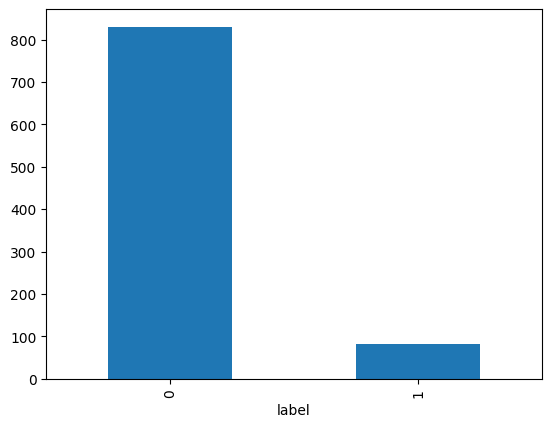

In [ ]:
df['label'].value_counts().plot(kind='bar')

In [ ]:
X = df.drop('label',axis=1)
y= df['label']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

In [ ]:
y.value_counts()

label
1    830
0    830
Name: count, dtype: int64

In [ ]:
!pip install optuna

  Using cached optuna-3.6.1-py3-none-any.whl (380 kB)
  Using cached alembic-1.13.1-py3-none-any.whl (233 kB)
  Using cached colorlog-6.8.2-py3-none-any.whl (11 kB)
  Using cached Mako-1.3.5-py3-none-any.whl (78 kB)


In [ ]:
import optuna
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
def objective(trial):
    weights = {
        0:trial.suggest_float(0,0,2),
        1:trial.suggest_float(1,0,2),
    }
    params = {
              'class_weight':weights,
              'max_depth': trial.suggest_int('max_depth',1,20),
              'max_leaf_nodes':trial.suggest_categorical('max_leaf_nodes',(2**np.arange(1,6,1)).tolist()),
              'learning_rate': trial.suggest_float('learning_rate',0,0.1),
              'l2_regularization': trial.suggest_float('l2_regularization',0,0.5),
              'min_samples_leaf': trial.suggest_int('min_samples_leaf',1,20),
              'tol': trial.suggest_categorical('tol',[1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11]),
              'warm_start':True,
              'max_iter': trial.suggest_int('max_iter',1,100),
              'random_state': trial.suggest_int('random_state',1,200),
              }
    k = trial.suggest_int('k',5,11)
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    model = HistGradientBoostingClassifier(**params)
    score =cross_val_score(model, X, y, cv=kf)
    mean_cross_val_score = score.mean()
    return mean_cross_val_score
study = optuna.create_study(direction="maximize")

[I 2024-06-10 15:23:36,181] A new study created in memory with name: no-name-3c3efdd3-f4cb-4c82-a693-ad4912e0f56d


In [ ]:
study.optimize(objective, n_trials=10,show_progress_bar=True)

  0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-06-10 15:24:02,499] Trial 0 finished with value: 0.8271029930959726 and parameters: {0: 1.4126664986352189, 1: 0.38533677828476587, 'max_depth': 4, 'max_leaf_nodes': 32, 'learning_rate': 0.09950014094143078, 'l2_regularization': 0.2259048654840033, 'min_samples_leaf': 17, 'tol': 1e-10, 'max_iter': 96, 'random_state': 147, 'k': 7}. Best is trial 0 with value: 0.8271029930959726.
[I 2024-06-10 15:24:04,489] Trial 1 finished with value: 0.6807742525133829 and parameters: {0: 0.07063430532339021, 1: 0.9798135126657466, 'max_depth': 7, 'max_leaf_nodes': 16, 'learning_rate': 0.041675274925016784, 'l2_regularization': 0.4610259327485618, 'min_samples_leaf': 8, 'tol': 1e-08, 'max_iter': 87, 'random_state': 172, 'k': 9}. Best is trial 0 with value: 0.8271029930959726.
[I 2024-06-10 15:24:06,289] Trial 2 finished with value: 0.9680671096461397 and parameters: {0: 1.9139851615292778, 1: 0.480977659638929, 'max_depth': 10, 'max_leaf_nodes': 32, 'learning_rate': 0.07627842716699654, 'l2_reg